# STAT 207 Lab 8: Inference for Associations - [25 total points] - Solutions

Due: Wednesday, March 31 11:59pm CST



## <u>Case Study 1</u>: U.S Unemployment Rates and Metropolitan Areas
In this lab we will explore the statistical concepts that we've learned this week while also examining the RELATIONSHIP between **unemployment rates** and **whether the county is a metropolitan county or not** in the U.S. 

The **metro** variable indicates "yes" if the county is a metropolitan area and indicates "no" otherwise.

## <u>Case Study 2</u>: U.S Median Education Levels and Metropolitan Areas
Also in this lab we will explore the statistical concepts that we've learned this week while also examining the RELATIONSHIP between **median educataion level** and **whether the county is a metropolitan county or not** in the U.S. 

### Imports

In [63]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()                              # sets the default plotting style
from scipy.stats import norm
from scipy.stats import t
import numpy as np

## 1. <u>Preliminaries</u>

### 1.1 [0.5pt] Read the county.csv into a dataframe, call it df, and display the first five rows.

Remember that 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.

In [2]:
missing_values = ["data unavailable"]
df = pd.read_csv("county.csv", na_values = missing_values)
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


### 1.2 [0.5pt] Create a dataframe that is just comprised of the metro variable,  the unemployment rates variable, and the median_edu variable. Then drop all missing values from this dataframe.

In [5]:
df_mum = df.loc[:,['metro', 'unemployment_rate', 'median_edu']].dropna()
df_mum.head()

,metro,unemployment_rate,median_edu
0,yes,3.86,some_college
1,yes,3.99,some_college
2,no,5.90,hs_diploma
3,yes,4.39,hs_diploma
4,yes,4.02,hs_diploma


### 1.3 [0.5pt] How many counties are metropolitan counties and how many are not?

In [8]:
df_mum['metro'].value_counts()

no     1974
yes    1165
Name: metro, dtype: int64

### 1.4 [0.5pt] Next, split this dataframe into two population dataframes:
1. <u>Population 1</u>:the counties that are metropolitan areas
2. <u>Population 2</u>:the counties that are not metropolitan areas


In [14]:
no = df_mum[df['metro'] == 'no']
no.shape

<ipython-input-14-9d6f9578189b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no = df_mum[df['metro'] == 'no']


(1974, 3)

In [15]:
yes = df_mum[df['metro'] == 'yes']
yes.shape

<ipython-input-15-508a3a3e186d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yes = df_mum[df['metro'] == 'yes']


(1165, 3)

### 1.5 [0.5pt] Calculate the mean and standard deviation unemployment rates for these two populations.

In [20]:
no_mean = no['unemployment_rate'].mean()
no_mean

4.737436676798379

In [21]:
no_std = no['unemployment_rate'].std()
no_std

1.8124518106510823

In [22]:
yes_mean = yes['unemployment_rate'].mean()
yes_mean

4.397957081545064

In [24]:
yes_std = yes['unemployment_rate'].std()
yes_std

1.299180067178401

### 1.6 [0.5pt] Finally, calculate the proportion of counties in the metro population that have a median education level of high school diploma and  calculate the proportion of counties in the non-metro population that have a median education level of high school diploma.

In [34]:
yes['median_edu'].value_counts()

some_college    814
hs_diploma      312
bachelors        39
Name: median_edu, dtype: int64

In [35]:
print(312/yes.shape[0])

0.26781115879828327


In [36]:
no['median_edu'].value_counts()

hs_diploma      1085
some_college     880
bachelors          7
below_hs           2
Name: median_edu, dtype: int64

In [37]:
print(1085/no.shape[0])

0.549645390070922


## 2. Numerical Sample Analysis

### 2.1 [1 pt] Collect a random sample of 40 metropolitan counties (using a random state of 100 without replacement) and do the following.
a. calculate the sample mean and standard deviation of the unemployment rate

b. plot the sample distribution of unemployment rates.

In [44]:
sample_yes = yes.sample(40, random_state = 100, replace = False)

In [45]:
sample_yes['unemployment_rate'].mean()

4.58225

In [46]:
sample_yes['unemployment_rate'].std()

1.2359995176747876

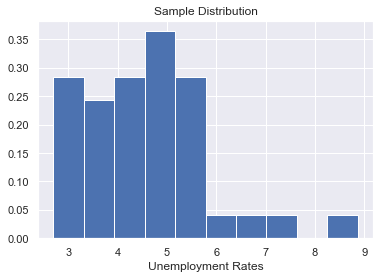

In [47]:
sample_yes['unemployment_rate'].hist(density=True)
plt.title('Sample Distribution')
plt.xlabel('Unemployment Rates')
plt.show()

### 2.2 [1 pt] Collect a random sample of 50 non-metropolitan counties (using a random state of 100 without replacement) and do the following.
a. calculate the sample mean and standard deviation of the unemployment rate

b. plot the sample distribution of unemployment rates.

In [48]:
sample_no = no.sample(50, random_state = 100, replace = False)

In [49]:
sample_no['unemployment_rate'].mean()

4.567400000000001

In [50]:
sample_no['unemployment_rate'].std()

1.4541240578128827

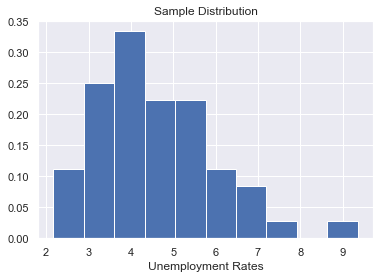

In [51]:
sample_no['unemployment_rate'].hist(density=True)
plt.title('Sample Distribution')
plt.xlabel('Unemployment Rates')
plt.show()

## 3. Sampling Distribution (of sample mean differences) Analysis

Assume that you have access to the populations you created in #1 in this part.

### 3.1 [1 pt] Calculate the mean and standard deviation of the sampling distribution of sample mean differences (ie. $\bar{x}_{metro}-\bar{x}_{nonmetro}$ values)

In [52]:
print(sample_yes['unemployment_rate'].mean() - sample_no['unemployment_rate'].mean())

0.014849999999999142


In [53]:
print(sample_yes['unemployment_rate'].std() - sample_no['unemployment_rate'].std())

-0.21812454013809512


### 3.2 [1 pt] Using the sample mean values $\bar{x}_{metro}$ and $\bar{x}_{nonmetro}$ that you calculated in #2, calculate the z-score of  $(\bar{x}_{metro}-\bar{x}_{nonmetro})$.

In [60]:
pop_mean = yes['unemployment_rate'].mean() - no['unemployment_rate'].mean()
print("Pop Mean: ", pop_mean)
sample_mean = sample_yes['unemployment_rate'].mean() - sample_no['unemployment_rate'].mean()
print("Sample Mean: ", sample_mean)
sample_std = sample_yes['unemployment_rate'].std() - sample_no['unemployment_rate'].std()
print("Sample Std: ", sample_std)

print("Z Score: ", ((pop_mean - sample_mean) / sample_std))

Pop Mean:  -0.33947959525331495
Sample Mean:  0.014849999999999142
Sample Std:  -0.21812454013809512
Z Score:  1.6244370992323343


## 4. Association Testing for Metro Areas and Unemployment Rate

**<font color="green">Now, assume that we do not know anything about the populations from #1.</font>**

We would like to test if there is an association between whether or not a county is a metropolitan area and the unemployment rate. Or in other words, we would like to see if we have enough evidence to suggest that the mean unemployment rate of all metropolitan counties is different from the mean unemployment rate of all non-metropolitan counties.

We will use the two samples we collected from #2 to help us conduct this test.

### 4.1 [1 pt] Set up the hypotheses for this test.

Ho: X(metro) = X(non-metro) or (X(metro) - X(non-metro) = 0)
Ha: X(metro) != X(non-metro) or (X(metro) - X(non-metro) != 0)

### 4.2 [2 pt] Check the conditions for conducting inference on these hypotheses.

1) The sample with non-metro counties is randomly selected.
n(no) = 50 < 10% of all non-metropolitan counties.
n(no) = 50 > 30, so CLT is met.
2) The sample with metro counties is randomly selected.
n(yes) = 40 < 10% of all metropolitan counties.
n(yes) = 40 > 30, so CLT is met.

We may assume that there is no pairwise relationship between the counties in each group.

Therefore, all conditions are met.


### 4.3 [1.5 pt] Calculate a 90% confidence interval for $\mu_{metro}-\mu_{nonmetro}$.

**Note:** You should use the most *accurate* way of calulating this confidence interval that we know now.

In [61]:
dfree = min(50 - 1, 40 - 1)
dfree

39

In [64]:
critical_value=t.ppf(0.95, df = dfree)
critical_value

1.6848751194973992

In [65]:
point_estimate = (sample_yes['unemployment_rate'].mean() - sample_no['unemployment_rate'].mean())
point_estimate

0.014849999999999142

In [66]:
standard_error = np.sqrt((sample_yes['unemployment_rate'].std() ** 2)/40 + (sample_no['unemployment_rate'].std() ** 2)/50)
standard_error

0.2836933303807331

In [67]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('90% Confidence Interval: ', lower_bound, upper_bound)

90% Confidence Interval:  -0.46313783392585367 0.49283783392585195


### 4.4 [1 pt] Use this 90% confidence interval to make a conclusion about your hypotheses.

We are 90% confident that the difference between Mu(metro) and Mu(nonmetro) is between -0.46313783392585367 & 0.49283783392585195. Therefore, since the value '0' resides in this interval, we fail to reject the null hypothesis. Therefore, there is not sufficient evidence to suggest the alternative hypothesis.

### 4.5 [1.5 pt] Calculate the p-value for this hypothesis test.

**Note:** You should use the most *accurate* way of calulating this p-value that we know now.

In [70]:
p_value = 2*((sample_yes['unemployment_rate'].mean() - sample_no['unemployment_rate'].mean() - 0) / np.sqrt((sample_yes['unemployment_rate'].std() ** 2)/40 + (sample_no['unemployment_rate'].std() ** 2)/50))
p_value

0.10469051196987657

### 4.6 [1 pt] Use this p-value to make a conclusion about your hypotheses, using a significance level of $\alpha=0.10$.

Since the p-value = 0.10469 > 0.10 = alpha, we fail to reject the null hypothesis. Therefore, there is not sufficient evidence to suggest the alternative hypothesis.

## 5. Categorical Samples Analysis

### [0.5 pt] 5.1 Using your metro and non-metro samples from #2, do the following.
a. calculate the proportion of counties in the metro sample in which the a median education level is a high school diploma.

b. calculate the proportion of counties in the nonmetro sample in which the a median education level is a high school diploma.

In [71]:
sample_yes['median_edu'].value_counts()

some_college    23
hs_diploma      15
bachelors        2
Name: median_edu, dtype: int64

In [73]:
yes_prop = (15/40)
yes_prop

0.375

In [72]:
sample_no['median_edu'].value_counts()

hs_diploma      28
some_college    22
Name: median_edu, dtype: int64

In [74]:
no_prop = (28/50)
no_prop

0.56

## 6. Sampling Distribution (of Sample Proportion Differences) Analysis

Assume that you have access to the populations you created in #1 in this part.

### 6.1 [1 pt] Calculate the mean and standard deviation of the sampling distribution of sample proportion differences (ie. $\hat{p}_{metro}-\hat{p}_{nonmetro}$ values)

E(𝑝̂ 𝑚𝑒𝑡𝑟𝑜−𝑝̂ 𝑛𝑜𝑛𝑚𝑒𝑡𝑟𝑜) = 𝑝̂ 𝑚𝑒𝑡𝑟𝑜−𝑝̂ 𝑛𝑜𝑛𝑚𝑒𝑡𝑟𝑜 = 0.375 - 0.56

In [75]:
prop_mean = 0.375 - 0.56
prop_mean

-0.18500000000000005

STD(𝑝̂ 𝑚𝑒𝑡𝑟𝑜−𝑝̂ 𝑛𝑜𝑛𝑚𝑒𝑡𝑟𝑜) = sqrt(p1(1-p1)/n1 + p2(1-p2)/n^2)

In [77]:
prop_std = np.sqrt((.375*(1-.375)/40) + (.56*(1-.56) / 50))
prop_std

0.10386228863259271

### 6.2 [1 pt] Using the sample proportion values $\hat{p}_{metro}$ and $\hat{p}_{nonmetro}$ that you calculated in #2, calculate the z-score of  $(\hat{p}_{metro}-\hat{p}_{nonmetro})$.

In [80]:
yes['median_edu'].value_counts()

some_college    814
hs_diploma      312
bachelors        39
Name: median_edu, dtype: int64

In [81]:
no['median_edu'].value_counts()

hs_diploma      1085
some_college     880
bachelors          7
below_hs           2
Name: median_edu, dtype: int64

In [94]:
dif_samp_prop = 0.375 - 0.56
print("Difference in Samp Prop: ", dif_samp_prop)
dif_pop_prop = (312/yes.shape[0]) - (1085/no.shape[0])
print("Difference in Pop Prop: ", dif_pop_prop)
z_score_prop = (dif_samp_prop - dif_pop_prop) / np.sqrt(0.375*(1-0.375)/40 + 0.56*(1-0.56)/50)
z_score_prop

Difference in Samp Prop:  -0.18500000000000005
Difference in Pop Prop:  -0.2818342312726387


0.9323329241779423

## 7. Association Testing for Metro Areas and Median Education Level

**<font color="green">Now, assume that we do not know anything about the populations from #1.</font>**

We would like to test if there is an association between whether or not a county is a metropolitan area and the median education level. Or in other words, we would like to see if we have enough evidence to suggest that the proportion of all metropolitan counties that have a median education level of high school diploma is different from the proportion of all nonmetropolitan counties that have a median education level of high school diploma.

We will use the two samples we collected from #2 to help us conduct this test.

### 7.1 [1 pt] Set up the hypotheses for this test.

Ho: 𝑝̂ 𝑚𝑒𝑡𝑟𝑜− 𝑝̂ 𝑛𝑜𝑛𝑚𝑒𝑡𝑟𝑜 = 0
Ha: 𝑝̂ 𝑚𝑒𝑡𝑟𝑜−𝑝̂ 𝑛𝑜𝑛𝑚𝑒𝑡𝑟𝑜 != 0

### 7.2 [2 pt] Check the conditions for conducting inference on these tests.

n1p1 = (40)(.375) = 15 >= 10
n1(1-p1) = (40)(1-.375) = 25 >= 10
n2p2 = (50)(.56) = 28 >= 10
n2(1-p2) = (50)(1-.56) = 22 >= 10

n1 = 40 < 10% of all US metro counties

n2 = 50 < 10% of all US nonmetro counties

These samples are indepedent of each other. Both samples are randomly collected.


### 7.3 [1.5 pt] Calculate a 88% confidence interval for $p_{metro}-p_{nonmetro}$.


In [98]:
point_estimate = 0.375 - 0.56
print("Point Estimate: ", point_estimate)

Point Estimate:  -0.18500000000000005


In [99]:
standard_error = np.sqrt(0.375*(1-0.375)/40 + 0.56*(1-0.56)/50)
print("Standard Error: ", standard_error)

Standard Error:  0.10386228863259271


In [100]:
critical_value=norm.ppf(.94)

In [101]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('88% Confidence Interval: ', lower_bound, upper_bound)

88% Confidence Interval:  -0.34648234384035215 -0.02351765615964796


### 7.4 [1 pt] Use this 88% confidence interval to make a conclusion about your hypotheses.

Because the null value of 0 does not reside in the interval range, we can reject the null hypothesis. We do have sufficient evidence to suggest that the proportion of metro counties with a median education of a high school diploma differs from that of the nonmetro counterpart. 

### 7.5 [1.5 pt] Calculate the p-value for this hypothesis test.


In [102]:
test_statistic=(point_estimate-0)/standard_error
pvalue = 2*(1-norm.cdf(np.abs(test_statistic)))
print('p-value: ', pvalue)

p-value:  0.07487901089381244


### 7.6 [0.5 pt] Use this p-value to make a conclusion about your hypotheses, using a significance level of $\alpha=0.12$.

Since the pvalue = 0.07 < 0.12 = alpha, we reject the null hypothesis. We do have sufficient evidence to suggest that the proportion of metro counties with a median education of a high school diploma differs from that of the nonmetro counterpart. 